# Clasificador de tejido sano y tejido cancerígeno en imágenes microscópicas del esófago


# Librerias

In [5]:
import warnings
warnings.filterwarnings(action='ignore')
import random
import pickle
import numpy as np
import pandas as pd
from skimage.io import imshow, imread
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

In [6]:
# Rutas
pathDatos = os.path.join(os.path.pardir,'datos')

In [3]:
# identificador de las imágenes y etiquetas
dfids = pd.read_csv(os.path.join(pathDatos,'ClasesImagenes.csv'))

In [4]:
dfids.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [5]:
type(dfids)

pandas.core.frame.DataFrame

In [6]:
# tamaño del FataFrame
dfids.shape

(5063, 2)

In [7]:
# Imágenes por cada una de las clases
dfids.class_number.value_counts()

class_number
1    3594
0    1469
Name: count, dtype: int64

In [8]:
# la columna class_number, es nuestra variable objetivo, la almacenaremos en un objeto de numpy
y = dfids.class_number

In [9]:
type(y)

pandas.core.series.Series

## Extracción y lectura de las imágenes

In [10]:
pathImagen = os.path.join(pathDatos,'CarpetaImagenes.zip')

with zipfile.ZipFile(pathImagen, 'r') as zip_ref:
    zip_ref.extractall(pathDatos)
print("Archivos descomprimidos exitosamente.")   

Archivos descomprimidos exitosamente.


# Exploración

In [11]:
imagenn = 'im_4_0.png'
pathimagenn = os.path.join(pathDatos,imagenn)
imag = imread(pathimagenn, as_gray=True)

In [12]:
type(imag)

numpy.ndarray

In [13]:
# Dimensiones de las imagenes
imag.shape

(260, 260)

In [14]:
imag[0]

array([0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322275,
       0.08322275, 0.08322275, 0.08322275, 0.08322275, 0.08322

In [15]:
# Exploramos el nivel de coloración de algunos de los pixeles de la imagen
imag[72:80, 170:190]

array([[0.29998118, 0.29998118, 0.30278667, 0.30504157, 0.30784706,
        0.30784706, 0.30784706, 0.31262471, 0.3154302 , 0.32246275,
        0.32246275, 0.32526824, 0.32526824, 0.33032863, 0.33988392,
        0.34185608, 0.34466157, 0.34972196, 0.35169412, 0.34691647],
       [0.27947176, 0.28227725, 0.28424941, 0.29014314, 0.29211529,
        0.29211529, 0.29520353, 0.29717569, 0.29998118, 0.30278667,
        0.30278667, 0.30504157, 0.30504157, 0.31262471, 0.32049059,
        0.32526824, 0.33032863, 0.33230078, 0.33032863, 0.33032863],
       [0.26654549, 0.26654549, 0.27215647, 0.27721686, 0.27947176,
        0.28424941, 0.28424941, 0.29014314, 0.29014314, 0.29014314,
        0.29014314, 0.29211529, 0.29520353, 0.29717569, 0.29998118,
        0.30784706, 0.3154302 , 0.3176851 , 0.32049059, 0.3154302 ],
       [0.2614851 , 0.2614851 , 0.26345725, 0.26345725, 0.27215647,
        0.27721686, 0.27721686, 0.27947176, 0.27947176, 0.27721686,
        0.27721686, 0.27947176, 0.28227725, 0

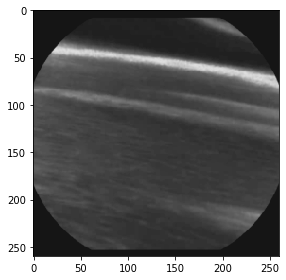

In [16]:
imshow(imag)

**Ahora vamos a hacer lo mismo para todas las imagenes**

In [18]:
dfids['image_filename']

0          im_4_0.png
1         im_21_0.png
2          im_9_0.png
3          im_8_0.png
4         im_15_0.png
            ...      
5058    im_114_55.png
5059      im_7_55.png
5060     im_52_55.png
5061     im_10_55.png
5062    im_111_55.png
Name: image_filename, Length: 5063, dtype: object

In [21]:
img = dfids['image_filename'].apply(lambda x: imread(os.path.join(pathDatos, x), as_gray=True))

In [22]:
type(img)

pandas.core.series.Series

In [25]:
help(imread)

Help on function imread in module skimage.io._io:

imread(fname, as_gray=False, plugin=None, **plugin_args)
    Load an image from file.
    
    Parameters
    ----------
    fname : string
        Image file name, e.g. ``test.jpg`` or URL.
    as_gray : bool, optional
        If True, convert color images to gray-scale (64-bit floats).
        Images that are already in gray-scale format are not converted.
    plugin : str, optional
        Name of plugin to use.  By default, the different plugins are
        tried (starting with imageio) until a suitable
        candidate is found.  If not given and fname is a tiff file, the
        tifffile plugin will be used.
    
    Other Parameters
    ----------------
    plugin_args : keywords
        Passed to the given plugin.
    
    Returns
    -------
    img_array : ndarray
        The different color bands/channels are stored in the
        third dimension, such that a gray-image is MxN, an
        RGB-image MxNx3 and an RGBA-image M

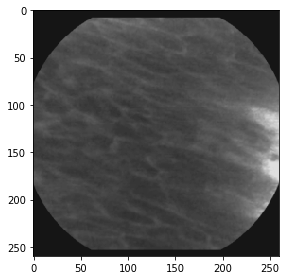

In [24]:
imshow(img[10])

- Dimensión 0: 260 renglones de pixeles de arriba a abajo
- Dimensión 1: 260 columnas de pixeles de izquierda a derecha

**Transformar imágenes en vectores**

In [27]:
# Cantidad de elementos en la serie
img.shape

(5063,)

In [28]:
# Cada elemento de mi secuencia es una matriz de 260 x 260
img[3673].shape

(260, 260)

*Lo primero es transformar la secuencia de matrices img en una sola matriz*

In [29]:
IMG = np.stack(img, axis=0)   # Toma una secuencia de matrices y las apila a lo largo
                              # de un tercer eje para hacer una solo arreglo
IMG.shape

(5063, 260, 260)

In [30]:
type(IMG)

numpy.ndarray

Ahora aplanamos la matriz de 2D (260x260 pixeles) de cada imagen, para obtener un vector por imagen.

In [34]:
X = IMG.reshape(5063, 67600)
X.shape

(5063, 67600)

numpy.ndarray

**Visualizamos ejemplos de ambas clases de imagenes**

In [3]:
# Agrupamos por nuestra variable objetivo
porClase = dfids.groupby('class_number')

# Elijimos al azar n muestras de cada subconjunto y guardamos la posición de las
# imagenes cancerigenas en la lista "c" y en  "s" las de tejido sano.
n = 20
c = random.sample(porClase.get_group(1).index.tolist(), n)
s = random.sample(porClase.get_group(0).index.tolist(), n)


# Creamos el espacio para las 40 imagenes que vamos a desplegar
fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4

# Desplegamos las imagenes
for i in range(0, 40):
    fig.add_subplot( rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('tejido sano')
        plt.xticks([])
        plt.yticks([])
plt.show()

NameError: name 'dfids' is not defined